## REGENERATION
## TEAM 3

# Preprocessing/Feature Engineering

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from scipy import stats
from difflib import SequenceMatcher
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.cluster import MeanShift

In [7]:
df = pd.read_excel("mpg.data.xlsx")

In [8]:
# used to select correct columns
df.drop(df.iloc[:, 9:13], inplace = True, axis = 1)
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [9]:
#Cylinders 3->4 and 5->6
df['cylinders'].replace({3: 4, 5: 6}, inplace=True)

In [10]:
#Origin to string
df['origin'] = df['origin'].astype('str')

## Missing Values 

In [13]:
# Usage of Pipeline including SVR regressor in order to fill missing values of horsepower



df1 = df.dropna()

source_data = df1[['mpg','acceleration','cylinders', 'displayments', 'weight']]
target_data = df1[['horsepower']]

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel="linear")),
])
clf.fit(source_data, target_data.values.flatten())

for row_id in df.index[df['horsepower'].isna()]:
    row = df.iloc[row_id]
    values = row[['mpg', 'acceleration','cylinders', 'displayments', 'weight']]
    prediction = clf.predict([values])[0]
    df.at[row_id, 'horsepower'] = prediction

In [14]:
# missing horsepower values
for rowId in df.index[df['horsepower'].isna()]:
    row = df.iloc[rowId]
    values = row[['mpg', 'acceleration','cylinders', 'displayments', 'weight']]
    prediction = horsePowerClassifier.predict([values])[0]
    df.at[rowId, 'horsepower'] = prediction

df.isna().sum()

mpg             8
cylinders       0
displayments    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [15]:
# rows with nan values on mpg cannot help us on this current project. We get rid of these rows
df = df.dropna()
df

,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Clustering

Repeating the same steps we made during the Exploratory Data Analysis

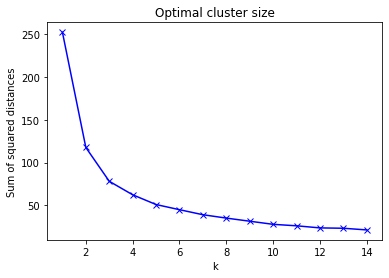

In [16]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


np.random.seed(0)


dfC = df[['cylinders','displayments','horsepower','weight','acceleration','model year','origin']]

dfC = dfC.dropna()


mms = MinMaxScaler()
mms.fit(dfC)
data_transformed = mms.transform(dfC)


sum_of_squared_distances = []
clusterRange = range(1, 15)
for k in clusterRange:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)


plt.plot(clusterRange, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal cluster size')
plt.show()

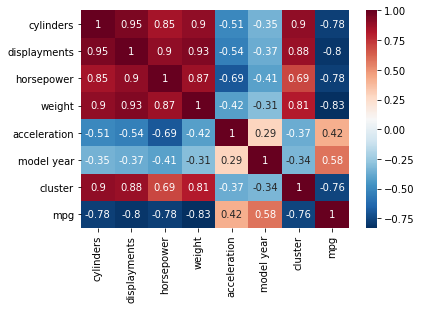

In [17]:
# ALready discussed in D02

km = KMeans(n_clusters=2)
km = km.fit(data_transformed)

dfC['cluster'] = km.fit_predict(data_transformed)
dfC['mpg'] = df['mpg']
plt.figure()
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

2


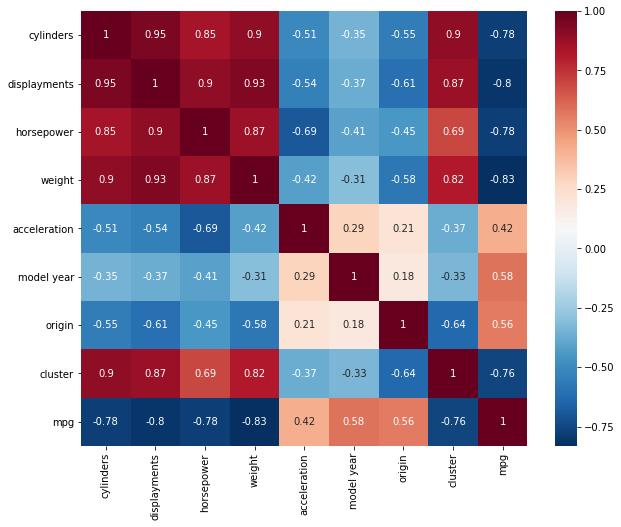

In [20]:


cluster = MeanShift()
cluster = cluster.fit(data_transformed)

n_clusters_ = len(cluster.cluster_centers_)
print(n_clusters_)

dfC['origin'] = dfC['origin'].astype('int')
dfC['cluster'] = cluster.fit_predict(data_transformed)
plt.figure(figsize=(10,8))
sns.heatmap(dfC.corr(), cmap='RdBu_r', annot=True)
plt.show()

In [21]:
dfC

,cylinders,displayments,horsepower,weight,acceleration,model year,origin,cluster,mpg
0,8,307.0,130.0,3504,12.0,70,1,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,1,17.0
...,...,...,...,...,...,...,...,...,...
401,4,140.0,86.0,2790,15.6,82,1,0,27.0
402,4,97.0,52.0,2130,24.6,82,2,0,44.0
403,4,135.0,84.0,2295,11.6,82,1,0,32.0
404,4,120.0,79.0,2625,18.6,82,1,0,28.0


## One-hot encoding

In [22]:
# origin / getdummies
dfC = pd.get_dummies(dfC, columns=['origin'])

In [23]:
dfC

,cylinders,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,1,18.0,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,15.0,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,18.0,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,16.0,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
401,4,140.0,86.0,2790,15.6,82,0,27.0,1,0,0
402,4,97.0,52.0,2130,24.6,82,0,44.0,0,1,0
403,4,135.0,84.0,2295,11.6,82,0,32.0,1,0,0
404,4,120.0,79.0,2625,18.6,82,0,28.0,1,0,0


In [24]:
# Keeping it for experimentations during model search
dfC['origin'] = df['origin']
dfC['car name'] = df['car name']

## Index re-ordering and CSV export

In [25]:
dfC = dfC.reset_index()

In [26]:
dfC

,index,cylinders,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3,origin,car name
0,0,8,307.0,130.0,3504,12.0,70,1,18.0,1,0,0,1,chevrolet chevelle malibu
1,1,8,350.0,165.0,3693,11.5,70,1,15.0,1,0,0,1,buick skylark 320
2,2,8,318.0,150.0,3436,11.0,70,1,18.0,1,0,0,1,plymouth satellite
3,3,8,304.0,150.0,3433,12.0,70,1,16.0,1,0,0,1,amc rebel sst
4,4,8,302.0,140.0,3449,10.5,70,1,17.0,1,0,0,1,ford torino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,401,4,140.0,86.0,2790,15.6,82,0,27.0,1,0,0,1,ford mustang gl
394,402,4,97.0,52.0,2130,24.6,82,0,44.0,0,1,0,2,vw pickup
395,403,4,135.0,84.0,2295,11.6,82,0,32.0,1,0,0,1,dodge rampage
396,404,4,120.0,79.0,2625,18.6,82,0,28.0,1,0,0,1,ford ranger


In [27]:
del dfC['index']

In [28]:
dfC

,cylinders,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3,origin,car name
0,8,307.0,130.0,3504,12.0,70,1,18.0,1,0,0,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,1,15.0,1,0,0,1,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,1,18.0,1,0,0,1,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,1,16.0,1,0,0,1,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,1,17.0,1,0,0,1,ford torino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,27.0,1,0,0,1,ford mustang gl
394,4,97.0,52.0,2130,24.6,82,0,44.0,0,1,0,2,vw pickup
395,4,135.0,84.0,2295,11.6,82,0,32.0,1,0,0,1,dodge rampage
396,4,120.0,79.0,2625,18.6,82,0,28.0,1,0,0,1,ford ranger


In [30]:
#CSV extract
dfC.to_csv("carbi.data.csv")